In [1]:
import sys
sys.path.append("..")
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import rasterio as rio
from src.plotting import map_plot, null_plot, geospatail_distribution_plot, prediction_vs_observed_plot
from src.data_processing import geospatial_data_processing, train_test_split, training_data_processing
from src.modelling import ML_model_training
from src.utils import download_file_from_s3

In [2]:
data = pd.read_csv("../data/training_data.csv", index_col="Unnamed: 133")
uk = gpd.read_file("../data/ukcp18-uk-land-country-hires.shp")

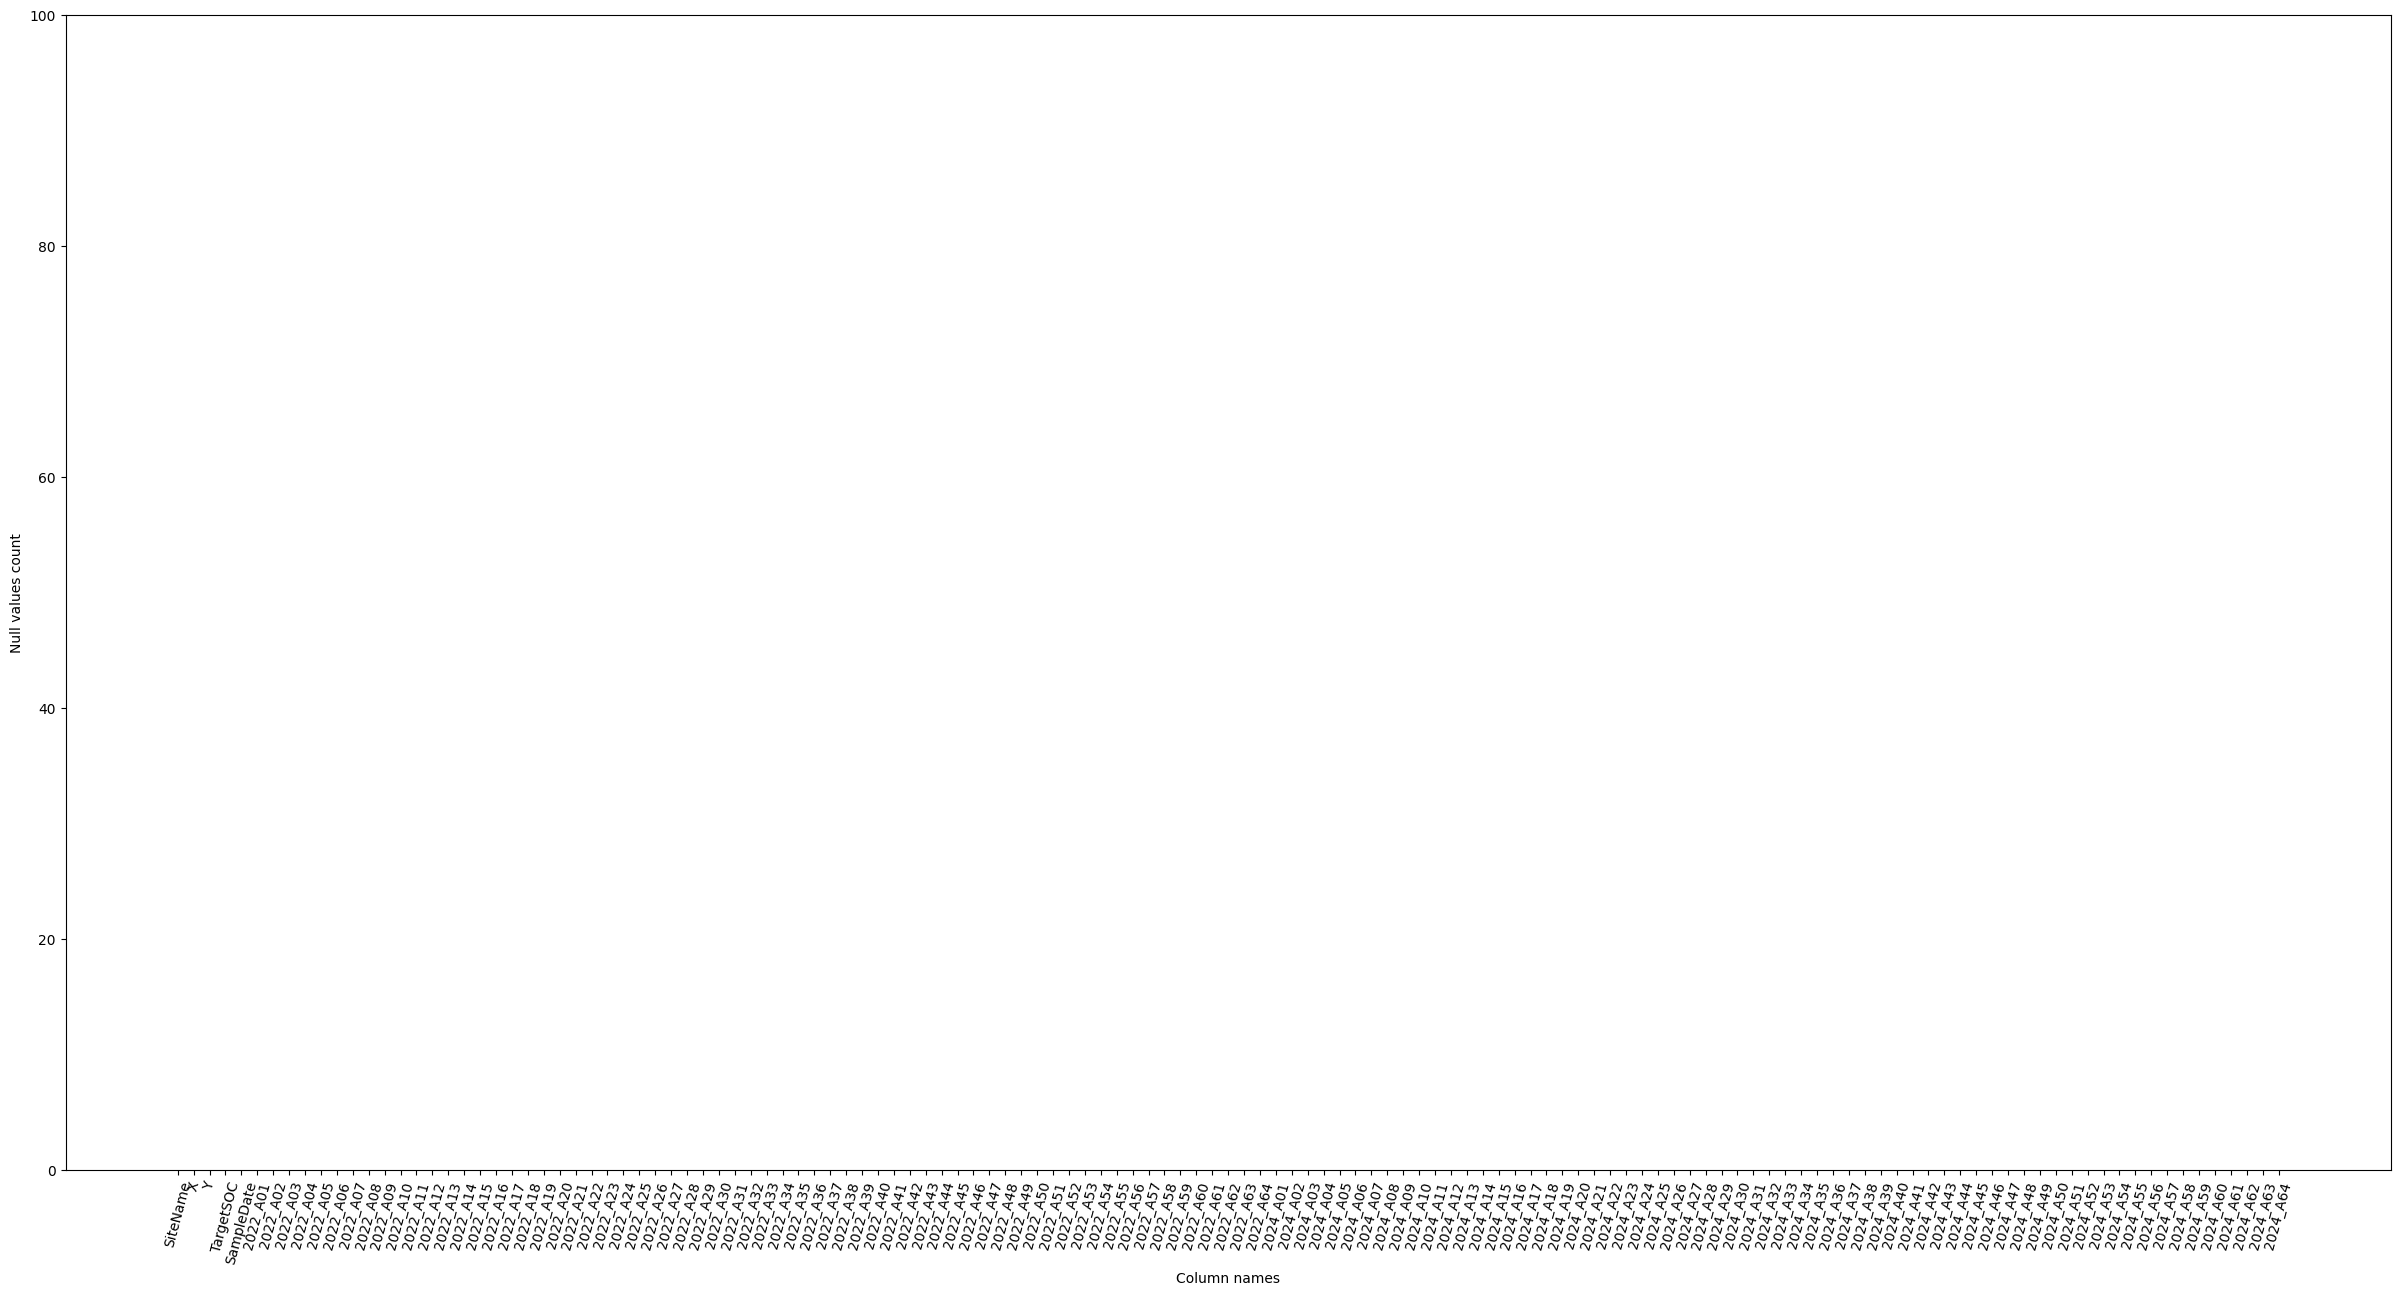

In [3]:
# Investigating the presence of missing or null values in the training data

null_plot(data)

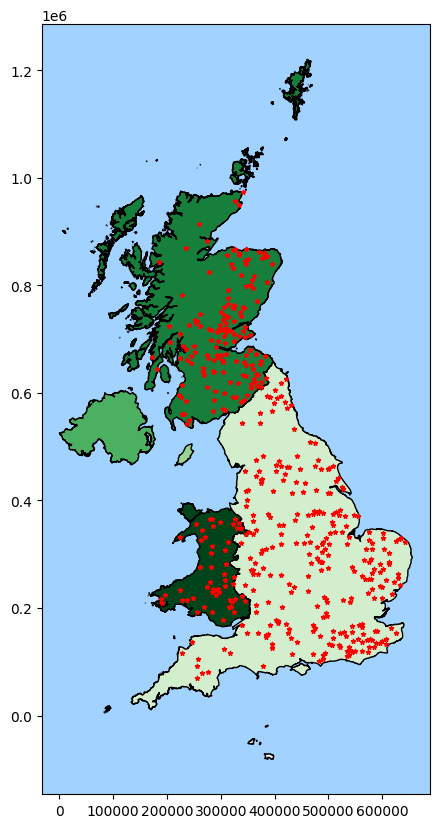

In [4]:
map_plot(data, uk, longitude_col="X", latitude_col="Y")

In [5]:
geo_data = geospatial_data_processing(data, bare_soil_months=[1, 2, 9, 10, 11, 12])

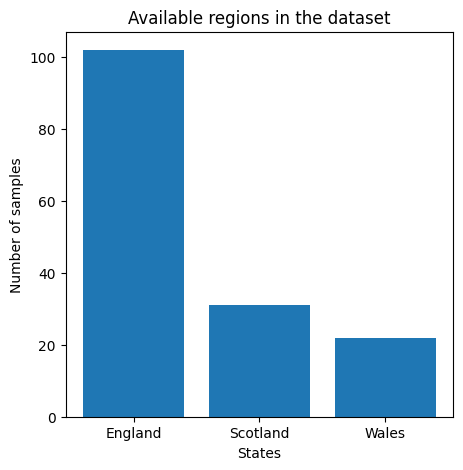

In [6]:
# Plotting available regions in the dataset to determine train and test strategy
geospatail_distribution_plot(geo_data)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(geo_data, train_state=["England", "Scotland"], test_state=["Wales"])

2026-01-09 11:32:09,377 - INFO - data_processing.py:train_test_split - training data has 133 rows and 140 columns
2026-01-09 11:32:09,382 - INFO - data_processing.py:train_test_split - testing data has 22 rows and 140 columns
2026-01-09 11:32:09,390 - INFO - data_processing.py:train_test_split - testing data is 14.0% of original data


In [8]:
pca, Xtrain_pro, Xtest_pro = training_data_processing(Xtrain=Xtrain, Xtest=Xtest, n_components=20, output_dir="../data/models")

2026-01-09 11:32:10,526 - INFO - data_processing.py:training_data_processing - training data dimensions are 133 rows and 20 features


In [9]:
ytest, predictions = ML_model_training(Xtrain=Xtrain_pro, Xtest=Xtest_pro, ytrain=ytrain, ytest=ytest, output_dir="../data/models")
print(f"Mean absolute error of prediction is {np.round(mean_absolute_error(ytest, predictions), 2)}")

2026-01-09 11:32:12,685 - INFO - modelling.py:ML_model_training - Fitted model successfully
Mean absolute error of prediction is 3.7


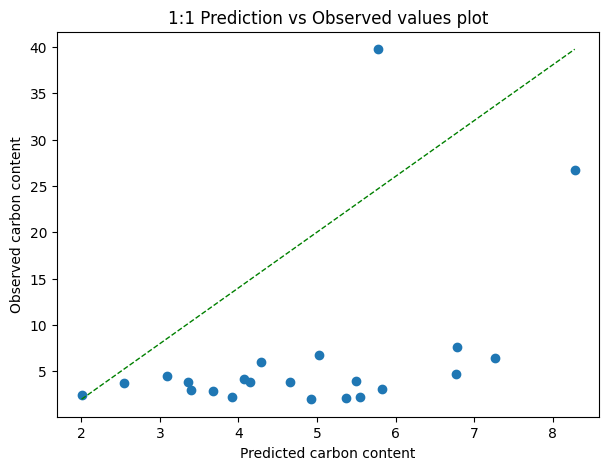

In [10]:
prediction_vs_observed_plot(predictions=predictions, observed=ytest)

In [4]:
bucket_name = "us-west-2.opendata.source.coop"
key_name = "tge-labs/aef/v1/annual/2024/30N/xks7764uu0jo1h8jh-0000008192-0000000000.tiff"
local_path = "../data/tiff_images/2024_embeddings.tiff"

download_file_from_s3(bucket_name=bucket_name, key_name=key_name, local_path=local_path)

2026-01-05 14:40:57,727 - INFO - utils.py:download_file_from_s3 - Starting file download
2026-01-05 14:40:57,729 - INFO - utils.py:download_file_from_s3 - Destination: ../data/tiff_images/2024_embeddings.tiff
2026-01-05 14:45:53,600 - INFO - utils.py:download_file_from_s3 - File downloaded sucessfuly


In [ ]:
with rio.open("../data/tiff_images/2024_embeddings.tiff") as file:
    print(file.ban)

64
